# Where to open a coffee business in Calgary Alberta, Canada?
### Import pandas, numpy and others

In [1]:
import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np
from bs4 import BeautifulSoup
import requests

import json

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install geopy
from geopy import Nominatim

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install html5lib

print("Libraries Imported")

Libraries Imported


### Install Sodapy to scrape JSON data from City of Calgary Open data website

In [2]:
!pip install sodapy
from sodapy import Socrata

##source = requests.get('https://data.calgary.ca/resource/j9ps-fyst.json')


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.calgary.ca", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.calgary.ca,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("j9ps-fyst", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)




#### Let's check out the location data

In [3]:
results_df.head()

,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4,:@computed_region_dyj4_ed5g,:@computed_region_kxmf_bzkv,:@computed_region_p8tp_5dkv,class,class_code,comm_code,comm_structure,latitude,location,longitude,name,sector,srg
0,1,6,1,53,6,Residential,1,YKV,BUILDING OUT,50.8704034468757,"{'latitude': '50.870403446876', 'longitude': '...",-114.076647581736,YORKVILLE,SOUTH,DEVELOPING
1,3,6,1,227,13,Residential,1,WWO,BUILDING OUT,50.8707242991201,"{'latitude': '50.87072429912', 'longitude': '-...",-114.008636787791,WOLF WILLOW,SOUTH,DEVELOPING
2,1,1,11,114,14,Residential,1,WSP,BUILDING OUT,51.0597323984505,"{'latitude': '51.059732398451', 'longitude': '...",-114.206168318752,WEST SPRINGS,WEST,DEVELOPING
3,1,5,8,216,6,Residential,1,WOO,1980s/1990s,50.9428758824735,"{'latitude': '50.942875882474', 'longitude': '...",-114.106339454003,WOODLANDS,SOUTH,BUILT-OUT
4,1,8,16,144,5,Residential,1,WND,1950s,51.0050404653601,"{'latitude': '51.00504046536', 'longitude': '-...",-114.083549507337,WINDSOR PARK,CENTRE,BUILT-OUT


#### Calgary Community Latitude and Longitude

In [4]:
cgyloc_df = results_df[['name','longitude','latitude']]
cgyloc_df.head()

,name,longitude,latitude
0,YORKVILLE,-114.076647581736,50.8704034468757
1,WOLF WILLOW,-114.008636787791,50.8707242991201
2,WEST SPRINGS,-114.206168318752,51.0597323984505
3,WOODLANDS,-114.106339454003,50.9428758824735
4,WINDSOR PARK,-114.083549507337,51.0050404653601


### Let's Get the Calgary Demographic Information

In [5]:
##source = requests.get('https://data.calgary.ca/resource/rkfr-buzb.json')


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.calgary.ca", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.calgary.ca,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results2 = client.get("rkfr-buzb", limit=2000)

# Convert to pandas DataFrame
results2_df = pd.DataFrame.from_records(results2)

In [6]:
results2_df.head()

,apartment,apt_na,apt_no_res,apt_occpd,apt_owned,apt_person,apt_uc,apt_vacant,cat_cnt,class,...,srg,town_house,twn_na,twn_no_res,twn_occpd,twn_owned,twn_person,twn_uc,twn_vacant,unknwn_sch
0,1004.0,2.0,8.0,909.0,394.0,1759.0,2.0,83.0,0.0,Residential,...,DEVELOPING,311.0,0.0,2.0,258.0,222.0,660.0,44.0,7.0,907.0
1,520.0,2.0,0.0,453.0,70.0,656.0,1.0,62.0,0.0,Residential,...,BUILT-OUT,24.0,0.0,0.0,18.0,0.0,46.0,2.0,4.0,1104.0
2,219.0,0.0,0.0,0.0,0.0,0.0,219.0,0.0,0.0,Residential,...,DEVELOPING,128.0,0.0,0.0,91.0,88.0,266.0,36.0,1.0,940.0
3,132.0,0.0,0.0,128.0,20.0,172.0,0.0,4.0,0.0,Residential,...,BUILT-OUT,111.0,0.0,0.0,110.0,42.0,299.0,0.0,1.0,790.0
4,117.0,0.0,0.0,104.0,19.0,254.0,0.0,13.0,0.0,Residential,...,BUILT-OUT,424.0,0.0,1.0,392.0,244.0,1143.0,0.0,27.0,727.0


#### According to Reuters (https//www.reuters.com/article/us-coffee-conference-survey/americans-are-drinking-a-daily-cup-of-coffee-at-the-highest-level-in-six-years-survey-idUSKCN1GT0KU) 48% of Millenials drink gourmet coffee daily
#### According to Wikipedia, the Millennial age group is 22-38 as of 2019 (https://en.wikipedia.org/wiki/Millennials)
#### Let's get the Calgary Community total population and cohort that falls in the 22-38 range. 


In [7]:
pop_df = results2_df[['name','class','sector','res_cnt','mf_20_24','mf_25_34','mf_35_44']]
pop_df.head()

,name,class,sector,res_cnt,mf_20_24,mf_25_34,mf_35_44
0,LEGACY,Residential,SOUTH,6420.0,418.0,1518.0,1204.0
1,HIGHLAND PARK,Residential,CENTRE,3838.0,217.0,777.0,798.0
2,CORNERSTONE,Residential,NORTHEAST,2648.0,125.0,607.0,593.0
3,MONTGOMERY,Residential,NORTHWEST,4515.0,317.0,1003.0,786.0
4,TEMPLE,Residential,NORTHEAST,10977.0,702.0,1616.0,1727.0


#### Unfortunately the Calgary demographic age data is broken in to 3 groupings from 20-44.
#### Let's look at the datatypes

In [8]:
print(pop_df.dtypes)

name        object
class       object
sector      object
res_cnt     object
mf_20_24    object
mf_25_34    object
mf_35_44    object
dtype: object


#### The columns containing numeric data needs to be converted from Object

In [9]:
pop_df['res_cnt'] = pd.to_numeric(pop_df['res_cnt'])
pop_df['mf_20_24'] = pd.to_numeric(pop_df['mf_20_24'])
pop_df['mf_25_34'] = pd.to_numeric(pop_df['mf_25_34'])
pop_df['mf_35_44'] = pd.to_numeric(pop_df['mf_35_44'])

print(pop_df.dtypes)


name         object
class        object
sector       object
res_cnt     float64
mf_20_24    float64
mf_25_34    float64
mf_35_44    float64
dtype: object


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [10]:
pop_df['res_cnt'] = pop_df['res_cnt'].astype(int)
pop_df['mf_20_24'] = pop_df['mf_20_24'].astype(int)
pop_df['mf_25_34'] = pop_df['mf_25_34'].astype(int)
pop_df['mf_35_44'] = pop_df['mf_35_44'].astype(int)
print(pop_df.dtypes)

name        object
class       object
sector      object
res_cnt      int64
mf_20_24     int64
mf_25_34     int64
mf_35_44     int64
dtype: object


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

#### Let's add Millennial age group together to make 1 group

In [11]:
pop_df['Millennial_Pop']=pop_df.loc[:,['mf_20_24','mf_25_34','mf_35_44']].sum(axis=1)
pop_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,class,sector,res_cnt,mf_20_24,mf_25_34,mf_35_44,Millennial_Pop
0,LEGACY,Residential,SOUTH,6420,418,1518,1204,3140
1,HIGHLAND PARK,Residential,CENTRE,3838,217,777,798,1792
2,CORNERSTONE,Residential,NORTHEAST,2648,125,607,593,1325
3,MONTGOMERY,Residential,NORTHWEST,4515,317,1003,786,2106
4,TEMPLE,Residential,NORTHEAST,10977,702,1616,1727,4045


#### Let's determine the percentage that millennials make up the total population

In [12]:
pop_df['Millennial_percent']=pop_df['Millennial_Pop']/pop_df['res_cnt']
pop_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,class,sector,res_cnt,mf_20_24,mf_25_34,mf_35_44,Millennial_Pop,Millennial_percent
0,LEGACY,Residential,SOUTH,6420,418,1518,1204,3140,0.489097
1,HIGHLAND PARK,Residential,CENTRE,3838,217,777,798,1792,0.466910
2,CORNERSTONE,Residential,NORTHEAST,2648,125,607,593,1325,0.500378
3,MONTGOMERY,Residential,NORTHWEST,4515,317,1003,786,2106,0.466445
4,TEMPLE,Residential,NORTHEAST,10977,702,1616,1727,4045,0.368498


### Let's Merge Location and Demographic Data

In [13]:
cgy_df = pd.merge(left=cgyloc_df, right=pop_df, how='left', left_on='name',right_on='name')
cgy_df.head()

,name,longitude,latitude,class,sector,res_cnt,mf_20_24,mf_25_34,mf_35_44,Millennial_Pop,Millennial_percent
0,YORKVILLE,-114.076647581736,50.8704034468757,Residential,SOUTH,14,0,0,0,0,0.000000
1,WOLF WILLOW,-114.008636787791,50.8707242991201,Residential,SOUTH,0,0,0,0,0,NaN
2,WEST SPRINGS,-114.206168318752,51.0597323984505,Residential,WEST,10758,411,905,2057,3373,0.313534
3,WOODLANDS,-114.106339454003,50.9428758824735,Residential,SOUTH,6002,294,734,736,1764,0.293902
4,WINDSOR PARK,-114.083549507337,51.0050404653601,Residential,CENTRE,4584,246,1046,890,2182,0.476003


### Have a look at the shape and data types of the merged dataframe

In [14]:
cgy_df.shape

(306, 11)

In [15]:
print(cgy_df.dtypes)

name                   object
longitude              object
latitude               object
class                  object
sector                 object
res_cnt                 int64
mf_20_24                int64
mf_25_34                int64
mf_35_44                int64
Millennial_Pop          int64
Millennial_percent    float64
dtype: object


### Let's look at some of the data stats

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

cgy_df.describe(include=['object'])

,name,longitude,latitude,class,sector
count,306,306,306,306,306
unique,306,306,306,4,8
top,COVENTRY HILLS,-114.19936200174,51.1377195777681,Residential,CENTRE
freq,1,1,1,212,62


In [17]:
cgy_df.describe()

,res_cnt,mf_20_24,mf_25_34,mf_35_44,Millennial_Pop,Millennial_percent
count,306.000000,306.000000,306.000000,306.000000,306.000000,211.000000
mean,4193.388889,248.000000,662.705882,713.228758,1623.934641,0.370588
std,5046.790123,317.050888,971.309317,929.914542,2128.164942,0.129668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.295609
50%,2363.000000,124.500000,331.000000,361.000000,819.000000,0.360150
75%,6897.250000,400.000000,1044.250000,1168.750000,2624.500000,0.450671
max,25710.000000,1949.000000,11015.000000,5342.000000,18306.000000,0.998310


#### Let's haver a look at the different types of neighborhood classes

In [18]:
cgy_df['class'].value_counts()

Residential          212
Residual Sub Area     48
Industrial            42
Major Park             4
Name: class, dtype: int64

In [19]:
cgy_df.head()

,name,longitude,latitude,class,sector,res_cnt,mf_20_24,mf_25_34,mf_35_44,Millennial_Pop,Millennial_percent
0,YORKVILLE,-114.076647581736,50.8704034468757,Residential,SOUTH,14,0,0,0,0,0.000000
1,WOLF WILLOW,-114.008636787791,50.8707242991201,Residential,SOUTH,0,0,0,0,0,NaN
2,WEST SPRINGS,-114.206168318752,51.0597323984505,Residential,WEST,10758,411,905,2057,3373,0.313534
3,WOODLANDS,-114.106339454003,50.9428758824735,Residential,SOUTH,6002,294,734,736,1764,0.293902
4,WINDSOR PARK,-114.083549507337,51.0050404653601,Residential,CENTRE,4584,246,1046,890,2182,0.476003


In [20]:
#Rename the Columns
cgy_df.columns = ['Neighborhood','Longitude','Latitude','Area_Class', 'Sector', 'Population', 'Population_20_24', 'Population_25_34','Population_35_44', 'Millennial_Population','Millennial_Percent']
cgy_df.head()

,Neighborhood,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
0,YORKVILLE,-114.076647581736,50.8704034468757,Residential,SOUTH,14,0,0,0,0,0.000000
1,WOLF WILLOW,-114.008636787791,50.8707242991201,Residential,SOUTH,0,0,0,0,0,NaN
2,WEST SPRINGS,-114.206168318752,51.0597323984505,Residential,WEST,10758,411,905,2057,3373,0.313534
3,WOODLANDS,-114.106339454003,50.9428758824735,Residential,SOUTH,6002,294,734,736,1764,0.293902
4,WINDSOR PARK,-114.083549507337,51.0050404653601,Residential,CENTRE,4584,246,1046,890,2182,0.476003


### Let's filter Industrial class areas out of the data

In [21]:
cgy_df = cgy_df[cgy_df.Area_Class !='Industrial']
cgy_df= cgy_df.reset_index(drop=True)
cgy_df['Area_Class'].value_counts()

Residential          212
Residual Sub Area     48
Major Park             4
Name: Area_Class, dtype: int64

### Let's make a map to check out the neighborhoods

In [22]:
!pip install folium
import folium
# create map of Calgary using latitude and longitude values
address = "Calgary, Alberta"

geolocator = Nominatim(user_agent="calgary_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

calgary_data = cgy_df

map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Sector, Neighborhood in zip(calgary_data['Latitude'], calgary_data['Longitude'], calgary_data['Sector'], calgary_data['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Sector)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

     |████████████████████████████████| 102kB 7.7MB/s ta 0:00:011


### Let's get make bar graphs of the Sector and Area_Class

Text(0.5, 1.0, "Count of Calgary's Neighborhood Area Class")

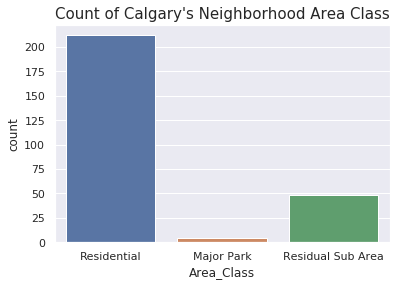

In [28]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Area_Class", data=cgy_df)
ax.set_title("Count of Calgary's Neighborhood Area Class", fontsize=15)

#### Let's See which Sector has the most Neighborhoods

Text(0.5, 1.0, "Count of Calgary's Non-Industrial Neighborhoods by city sector")

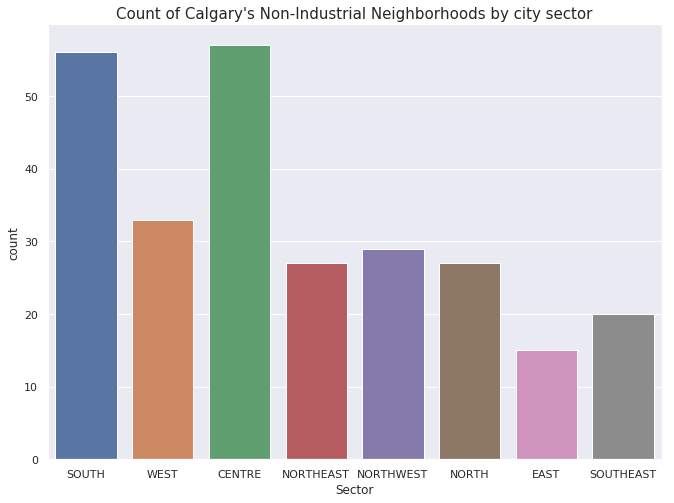

In [29]:
import seaborn as sns
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(11,8))
ax = sns.countplot(x="Sector", data=cgy_df)
ax.set_title("Count of Calgary's Non-Industrial Neighborhoods by city sector",fontsize=15)

Text(0.5, 1.0, "Population Count of Calgary's Neighborhoods by city sector")

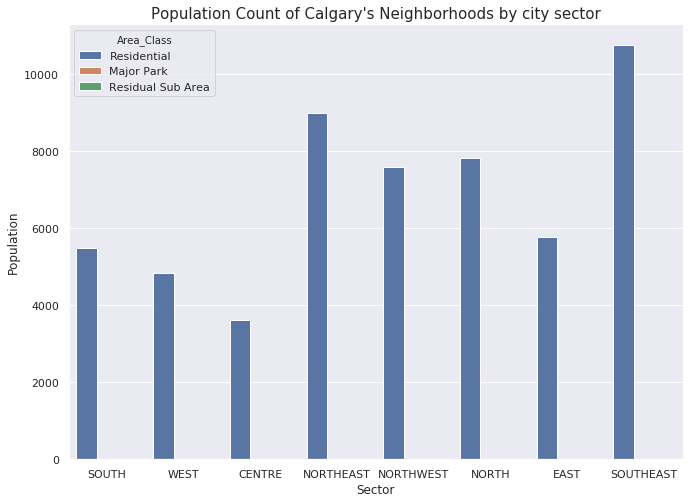

In [30]:
import seaborn as sns
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(11,8))
ax = sns.barplot(x="Sector",y='Population', hue="Area_Class", data=cgy_df,ci=None)
ax.set_title("Population Count of Calgary's Neighborhoods by city sector",fontsize=15)

Text(0.5, 1.0, "Millennial Population Count of Calgary's Neighborhoods by city sector")

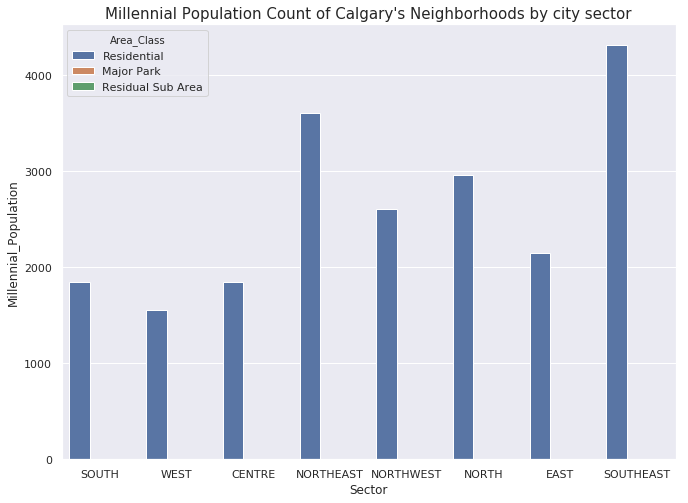

In [31]:
import seaborn as sns
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(11,8))
ax = sns.barplot(x="Sector",y='Millennial_Population', hue="Area_Class", data=cgy_df,ci=None)
ax.set_title("Millennial Population Count of Calgary's Neighborhoods by city sector",fontsize=15)

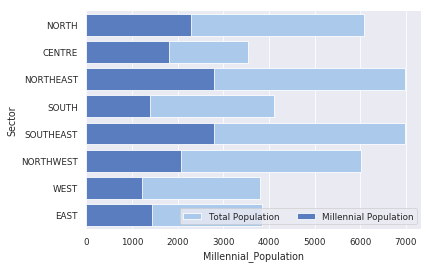

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_context('paper')

cgy_df = cgy_df.sort_values('Population', ascending = False)
f, ax = plt.subplots(figsize = (6,4))
sns.set_color_codes('pastel')
sns.barplot(x = 'Population', y = 'Sector', data = cgy_df,
            label = 'Total Population', color = 'b', edgecolor = 'w',ci=None)
sns.set_color_codes('muted')
sns.barplot(x = 'Millennial_Population', y = 'Sector', data = cgy_df,
            label = 'Millennial Population', color = 'b', edgecolor = 'w',ci=None)
ax.legend(ncol = 2, loc = 'lower right')

sns.despine(left = True, bottom = True)
plt.show()

#### Let's Find the Top 10 Neighborhoods by General Population

In [38]:
cgy_df.head(10)

,Neighborhood,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
79,PANORAMA HILLS,-114.08806596268,51.1597128161622,Residential,NORTH,25710,1511,3021,5027,9559,0.371801
203,BELTLINE,-114.055186108942,51.0374499480811,Residential,CENTRE,25129,1949,11015,5342,18306,0.728481
50,SADDLE RIDGE,-113.94562255923,51.1305800978341,Residential,NORTHEAST,22321,1633,4040,4021,9694,0.434300
148,EVERGREEN,-114.115316324128,50.9186997881711,Residential,SOUTH,21500,1177,2321,3646,7144,0.332279
169,CRANSTON,-113.979988807808,50.8782053378332,Residential,SOUTHEAST,19884,750,2908,3953,7611,0.382770
21,TUSCANY,-114.24083757895,51.1219158894765,Residential,NORTHWEST,19884,836,2099,3611,6546,0.329209
24,TARADALE,-113.934002032237,51.1179408168819,Residential,NORTHEAST,19026,1395,3117,3530,8042,0.422685
101,MCKENZIE TOWNE,-113.96147703565,50.9171357418281,Residential,SOUTHEAST,18283,759,3050,3753,7562,0.413608
147,EVANSTON,-114.112452815941,51.1711806369904,Residential,NORTH,17685,639,3242,3919,7800,0.441052
171,COVENTRY HILLS,-114.053148526228,51.1649029942561,Residential,NORTH,17667,992,2570,3432,6994,0.395879


#### Let's find Calgary's top 10 Neighborhoods by Millennial Population

In [37]:
cgy_df.sort_values(['Millennial_Population'],ascending = False).head(10)

,Neighborhood,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
203,BELTLINE,-114.055186108942,51.0374499480811,Residential,CENTRE,25129,1949,11015,5342,18306,0.728481
50,SADDLE RIDGE,-113.94562255923,51.1305800978341,Residential,NORTHEAST,22321,1633,4040,4021,9694,0.434300
79,PANORAMA HILLS,-114.08806596268,51.1597128161622,Residential,NORTH,25710,1511,3021,5027,9559,0.371801
24,TARADALE,-113.934002032237,51.1179408168819,Residential,NORTHEAST,19026,1395,3117,3530,8042,0.422685
208,AUBURN BAY,-113.958473020664,50.8925918587373,Residential,SOUTHEAST,17607,593,3232,4109,7934,0.450616
147,EVANSTON,-114.112452815941,51.1711806369904,Residential,NORTH,17685,639,3242,3919,7800,0.441052
169,CRANSTON,-113.979988807808,50.8782053378332,Residential,SOUTHEAST,19884,750,2908,3953,7611,0.382770
101,MCKENZIE TOWNE,-113.96147703565,50.9171357418281,Residential,SOUTHEAST,18283,759,3050,3753,7562,0.413608
148,EVERGREEN,-114.115316324128,50.9186997881711,Residential,SOUTH,21500,1177,2321,3646,7144,0.332279
171,COVENTRY HILLS,-114.053148526228,51.1649029942561,Residential,NORTH,17667,992,2570,3432,6994,0.395879


#### Let's Find Calgary's top 10 Neighborhoods by Millennial Population Percent

In [39]:
cgy_df.sort_values(['Millennial_Percent'],ascending = False).head(10)

,Neighborhood,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
16,UNIVERSITY OF CALGARY,-114.129916783917,51.0750124064486,Residential,NORTHWEST,2367,1343,742,278,2363,0.998310
203,BELTLINE,-114.055186108942,51.0374499480811,Residential,CENTRE,25129,1949,11015,5342,18306,0.728481
36,SUNALTA,-114.101455470711,51.0429561464851,Residential,CENTRE,3239,127,1066,1058,2251,0.694968
178,CLIFF BUNGALOW,-114.074890819558,51.0339299216613,Residential,CENTRE,1895,166,758,390,1314,0.693404
109,LOWER MOUNT ROYAL,-114.08650004594,51.0364833936673,Residential,CENTRE,3457,247,1359,758,2364,0.683830
97,MISSION,-114.066321693987,51.0310903237998,Residential,CENTRE,4598,281,1829,900,3010,0.654632
201,BANKVIEW,-114.10094728858,51.0341327509478,Residential,CENTRE,5256,396,1868,1172,3436,0.653729
160,DOWNTOWN COMMERCIAL CORE,-114.069590268745,51.0472701323622,Residential,CENTRE,8683,894,3179,1504,5577,0.642290
29,SUNNYSIDE,-114.079016652198,51.0564194112469,Residential,CENTRE,4230,388,1458,812,2658,0.628369
202,BANFF TRAIL,-114.115121173491,51.0742191596095,Residential,CENTRE,4153,768,1090,560,2418,0.582230


### It look's like Calgary Centre tends to have the largest percentage of Millennials living in it's Neighborhoods
### But The larger populations of Millennials is spreadout throughout the City

### Let's Refine the Dataset to Residential
### Let's also limit the data to Millennial Population over 2500 people

In [40]:
cgy_resdf = cgy_df[cgy_df.Area_Class == 'Residential'] 
cgy_resdf = cgy_resdf[cgy_resdf.Millennial_Population >= 2500]   
cgy_resdf.reset_index(inplace = True,drop = True) 
cgy_resdf.head()



,Neighborhood,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
0,PANORAMA HILLS,-114.08806596268,51.1597128161622,Residential,NORTH,25710,1511,3021,5027,9559,0.371801
1,BELTLINE,-114.055186108942,51.0374499480811,Residential,CENTRE,25129,1949,11015,5342,18306,0.728481
2,SADDLE RIDGE,-113.94562255923,51.1305800978341,Residential,NORTHEAST,22321,1633,4040,4021,9694,0.434300
3,EVERGREEN,-114.115316324128,50.9186997881711,Residential,SOUTH,21500,1177,2321,3646,7144,0.332279
4,CRANSTON,-113.979988807808,50.8782053378332,Residential,SOUTHEAST,19884,750,2908,3953,7611,0.382770


### What is the new Shape of the dataset

In [41]:
cgy_resdf.shape

(88, 11)

## Lets make a map of only residential areas with Millennial Populations over 2500
#### Circle Radius reflects Millennial Population

In [42]:
# create map of Calgary using latitude and longitude values
address = "Calgary, Alberta"

geolocator = Nominatim(user_agent="calgary_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

calgary_data = cgy_resdf

map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Sector, Neighborhood,Millennial_Population in zip(calgary_data['Latitude'], calgary_data['Longitude'], calgary_data['Sector'], calgary_data['Neighborhood'],calgary_data['Millennial_Population']):
    label = '{}, {}, Millen.Pop {}'.format(Neighborhood, Sector, Millennial_Population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= Millennial_Population/1000,
        ##calgary_data['Millennial_Percent']*100
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

In [43]:
CLIENT_ID = '5HR35KSDY4NQRRSNZGSSDQKDENORJ0EUE4RUUSF2JR4MJXGL' # your Foursquare ID
CLIENT_SECRET = 'BGHMTAXUEUK3FP35YKSANDNAUNWD1BUI0ARFBKEKDA51VDMJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5HR35KSDY4NQRRSNZGSSDQKDENORJ0EUE4RUUSF2JR4MJXGL
CLIENT_SECRET:BGHMTAXUEUK3FP35YKSANDNAUNWD1BUI0ARFBKEKDA51VDMJ


### Explore the first neighborhood in dataframe

In [44]:
calgary_data.loc[0, 'Neighborhood']

neighborhood_latitude = calgary_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = calgary_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = calgary_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of PANORAMA HILLS are 51.1597128161622, -114.08806596268.


### Pull the top 100  from Panorama Hills

In [72]:
LIMIT = 100 #limit number of venues returned by Foursquare API
radius = 500 #define radius meters

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=5HR35KSDY4NQRRSNZGSSDQKDENORJ0EUE4RUUSF2JR4MJXGL&client_secret=BGHMTAXUEUK3FP35YKSANDNAUNWD1BUI0ARFBKEKDA51VDMJ&v=20180605&ll=51.1597128161622,-114.08806596268&radius=500&limit=100'

In [73]:
results_cgy = requests.get(url).json()
results_cgy

{'meta': {'code': 200, 'requestId': '5ec6c41b1d67cb001b10cbfe'},
 'response': {'headerLocation': 'Panorama Hills',
  'headerFullLocation': 'Panorama Hills, Calgary',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 51.1642128206622,
    'lng': -114.08090405451135},
   'sw': {'lat': 51.155212811662196, 'lng': -114.09522787084866}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53b086b0498e241b0ac2f598',
       'name': 'Country Pizza',
       'location': {'address': '#128, 40 Country Hills Landng NW',
        'lat': 51.15875227063915,
        'lng': -114.09315564141444,
        'labeledLatLngs': [{'label': 'display',
          'lat': 51.15875227063915,
          'lng': -114.09315564141444}],
        'distance': 371,


### Get the category type and structure the data into a pandas dataframe

In [74]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results_cgy['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Country Pizza,Pizza Place,51.158752,-114.093156
1,Little Ceasars,Pizza Place,51.156464,-114.083695
2,Panorama Basketball Court,Basketball Court,51.156336,-114.083896
3,Gotcha Covered of Airdrie,Home Service,51.163627,-114.084778


In [75]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


### Create a function to repeat the same process to all the neighbourhoods in Calgary

In [76]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get data for all Calgary Centre Neighborhoods and create a new dataframe called calgary_venues

In [77]:
calgary_venues = getNearbyVenues(names=calgary_data['Neighborhood'],
                                   latitudes=calgary_data['Latitude'],
                                   longitudes=calgary_data['Longitude']
                                  )

PANORAMA HILLS
BELTLINE
SADDLE RIDGE
EVERGREEN
CRANSTON
TUSCANY
TARADALE
MCKENZIE TOWNE
EVANSTON
COVENTRY HILLS
AUBURN BAY
EDGEMONT
MARTINDALE
COPPERFIELD
HUNTINGTON HILLS
MCKENZIE LAKE
SIGNAL HILL
NEW BRIGHTON
DOUGLASDALE/GLEN
VARSITY
CHAPARRAL
BRIDLEWOOD
WHITEHORN
MAHOGANY
SKYVIEW RANCH
ROYAL OAK
RUNDLE
HIDDEN VALLEY
BEDDINGTON HEIGHTS
BOWNESS
TEMPLE
WEST SPRINGS
FALCONRIDGE
ARBOUR LAKE
ACADIA
MONTEREY PARK
DOVER
LAKE BONAVISTA
CITADEL
PINERIDGE
SPRINGBANK HILL
SUNDANCE
ASPEN WOODS
SHAWNESSY
HAWKWOOD
RIVERBEND
MARLBOROUGH
DALHOUSIE
WOODBINE
THORNCLIFFE
DOWNTOWN COMMERCIAL CORE
SILVER SPRINGS
OGDEN
PENBROOKE MEADOWS
SOMERSET
MARLBOROUGH PARK
ROCKY RIDGE
SAGE HILL
FOREST LAWN
KILLARNEY/GLENGARRY
SILVERADO
CANYON MEADOWS
RANCHLANDS
NOLAN HILL
GLENBROOK
BRENTWOOD
HAYSBORO
ERIN WOODS
ALBERT PARK/RADISSON HEIGHTS
APPLEWOOD PARK
ALTADORE
KINCORA
BRIDGELAND/RIVERSIDE
CRESCENT HEIGHTS
RENFREW
HILLHURST
GLAMORGAN
WEST HILLHURST
LEGACY
SHERWOOD
WALDEN
CASTLERIDGE
MOUNT PLEASANT
REDSTONE
TUXEDO 

### Check the size of the Dataframe

In [78]:
print(calgary_venues.shape)
calgary_venues.head()

(486, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PANORAMA HILLS,51.1597128161622,-114.08806596268,Country Pizza,51.158752,-114.093156,Pizza Place
1,PANORAMA HILLS,51.1597128161622,-114.08806596268,Little Ceasars,51.156464,-114.083695,Pizza Place
2,PANORAMA HILLS,51.1597128161622,-114.08806596268,Panorama Basketball Court,51.156336,-114.083896,Basketball Court
3,PANORAMA HILLS,51.1597128161622,-114.08806596268,Gotcha Covered of Airdrie,51.163627,-114.084778,Home Service
4,BELTLINE,51.0374499480811,-114.055186108942,Scotiabank Saddledome,51.038240,-114.052238,Hockey Arena


Text(0.5, 1.0, "Calgary's Top Venues by Venue Category")

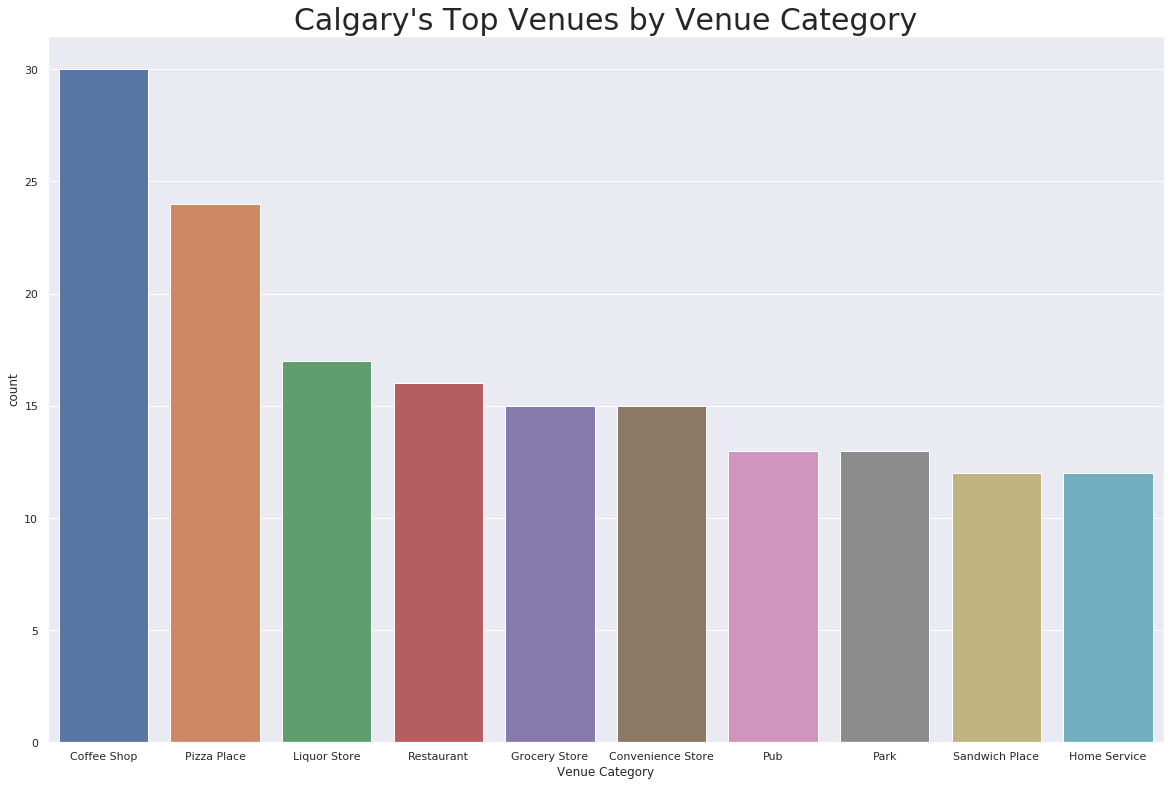

In [79]:
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(20,13))
ax1 = sns.countplot(x="Venue Category", data=calgary_venues,order=pd.value_counts(calgary_venues['Venue Category']).iloc[:10].index)
ax1.set_title("Calgary's Top Venues by Venue Category", fontsize = 30)

### Let's Limit the Venue Category to Coffee Shop

In [80]:
cgycs_df = calgary_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']]
#cgycs_df = cgycs_df['Venue Category'].isin(['Coffee Shop','Cafe'])
cgycs_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PANORAMA HILLS,51.1597128161622,-114.08806596268,Country Pizza,51.158752,-114.093156,Pizza Place
1,PANORAMA HILLS,51.1597128161622,-114.08806596268,Little Ceasars,51.156464,-114.083695,Pizza Place
2,PANORAMA HILLS,51.1597128161622,-114.08806596268,Panorama Basketball Court,51.156336,-114.083896,Basketball Court
3,PANORAMA HILLS,51.1597128161622,-114.08806596268,Gotcha Covered of Airdrie,51.163627,-114.084778,Home Service
4,BELTLINE,51.0374499480811,-114.055186108942,Scotiabank Saddledome,51.038240,-114.052238,Hockey Arena


In [81]:
print(cgycs_df.shape)

(486, 7)


### Filter the Venues to Coffee shops or Cafes

In [82]:
coffeesearch_values = ['Coffee Shop','Cafe']
cgycs_df = cgycs_df[cgycs_df['Venue Category'].str.contains('|'.join(coffeesearch_values ))]
cgycs_df.shape

(31, 7)

### How many unique categories

In [83]:
print('There are {} unique categories.'.format(len(cgycs_df['Venue Category'].unique())))

There are 2 unique categories.


### Let's get a count of coffee shops in the Calgary Residential Neighborhoods

In [84]:
cgycs_df.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALBERT PARK/RADISSON HEIGHTS,1,1,1,1,1,1
ASPEN WOODS,1,1,1,1,1,1
BANKVIEW,1,1,1,1,1,1
BRIDGELAND/RIVERSIDE,1,1,1,1,1,1
CHAPARRAL,2,2,2,2,2,2
CITADEL,1,1,1,1,1,1
CRANSTON,1,1,1,1,1,1
DOWNTOWN COMMERCIAL CORE,9,9,9,9,9,9
EDGEMONT,1,1,1,1,1,1


### Let's Combine Demographic Data with Coffee Shop Number for each Neighborhood
#### First Clean Venue category to all equal Coffee Shop

In [87]:
cgycs_df['Venue Category'].replace('Cafeteria','Coffee Shop',inplace=True)
cgycs_df.head(31)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
26,CRANSTON,50.8782053378332,-113.979988807808,Starbucks,50.880276,-113.977238,Coffee Shop
43,MCKENZIE TOWNE,50.9171357418281,-113.96147703565,Tim Hortons,50.917263,-113.959829,Coffee Shop
46,MCKENZIE TOWNE,50.9171357418281,-113.96147703565,Second Cup,50.915547,-113.960285,Coffee Shop
70,EDGEMONT,51.1245771244116,-114.143942746418,Friends Cappuccino Bar & Bake Shop,51.126370,-114.138676,Coffee Shop
87,CHAPARRAL,50.8846016151615,-114.025647775936,Tim Hortons,50.886063,-114.026358,Coffee Shop
88,CHAPARRAL,50.8846016151615,-114.025647775936,Tim Hortons,50.886110,-114.026485,Coffee Shop
115,WEST SPRINGS,51.0597323984505,-114.206168318752,Starbucks,51.060318,-114.212768,Coffee Shop
118,WEST SPRINGS,51.0597323984505,-114.206168318752,Tim Hortons,51.059417,-114.212103,Coffee Shop
122,WEST SPRINGS,51.0597323984505,-114.206168318752,Waves Coffee House,51.061338,-114.209207,Coffee Shop
157,CITADEL,51.1445109474745,-114.183838665806,Tim Hortons,51.141990,-114.182524,Coffee Shop


In [119]:
cgy_resdf.head()

,Neighborhood,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
0,PANORAMA HILLS,-114.08806596268,51.1597128161622,Residential,NORTH,25710,1511,3021,5027,9559,0.371801
1,BELTLINE,-114.055186108942,51.0374499480811,Residential,CENTRE,25129,1949,11015,5342,18306,0.728481
2,SADDLE RIDGE,-113.94562255923,51.1305800978341,Residential,NORTHEAST,22321,1633,4040,4021,9694,0.434300
3,EVERGREEN,-114.115316324128,50.9186997881711,Residential,SOUTH,21500,1177,2321,3646,7144,0.332279
4,CRANSTON,-113.979988807808,50.8782053378332,Residential,SOUTHEAST,19884,750,2908,3953,7611,0.382770


In [120]:
cgycoffee_df = pd.merge(left=cgycs_df, right=cgy_resdf, how='left', left_on='Neighborhood',right_on='Neighborhood')
cgycoffee_df.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
0,CRANSTON,50.8782053378332,-113.979988807808,Starbucks,50.880276,-113.977238,Coffee Shop,-113.979988807808,50.8782053378332,Residential,SOUTHEAST,19884,750,2908,3953,7611,0.382770
1,MCKENZIE TOWNE,50.9171357418281,-113.96147703565,Tim Hortons,50.917263,-113.959829,Coffee Shop,-113.96147703565,50.9171357418281,Residential,SOUTHEAST,18283,759,3050,3753,7562,0.413608
2,MCKENZIE TOWNE,50.9171357418281,-113.96147703565,Second Cup,50.915547,-113.960285,Coffee Shop,-113.96147703565,50.9171357418281,Residential,SOUTHEAST,18283,759,3050,3753,7562,0.413608
3,EDGEMONT,51.1245771244116,-114.143942746418,Friends Cappuccino Bar & Bake Shop,51.126370,-114.138676,Coffee Shop,-114.143942746418,51.1245771244116,Residential,NORTHWEST,15395,960,1300,1786,4046,0.262813
4,CHAPARRAL,50.8846016151615,-114.025647775936,Tim Hortons,50.886063,-114.026358,Coffee Shop,-114.025647775936,50.8846016151615,Residential,SOUTH,12654,720,1161,2071,3952,0.312312


In [121]:
# one hot encoding
calgary_onehot = pd.get_dummies(cgycoffee_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
calgary_onehot['Neighborhood'] = cgycoffee_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [calgary_onehot.columns[-1]] + list(calgary_onehot.columns[:-1])
calgary_onehot = calgary_onehot[fixed_columns]

calgary_onehot.head(35)

,Neighborhood,Coffee Shop
0,CRANSTON,1
1,MCKENZIE TOWNE,1
2,MCKENZIE TOWNE,1
3,EDGEMONT,1
4,CHAPARRAL,1
5,CHAPARRAL,1
6,WEST SPRINGS,1
7,WEST SPRINGS,1
8,WEST SPRINGS,1
9,CITADEL,1


In [122]:
calgary_grouped = calgary_onehot.groupby('Neighborhood').count().reset_index()
calgary_grouped

,Neighborhood,Coffee Shop
0,ALBERT PARK/RADISSON HEIGHTS,1
1,ASPEN WOODS,1
2,BANKVIEW,1
3,BRIDGELAND/RIVERSIDE,1
4,CHAPARRAL,2
5,CITADEL,1
6,CRANSTON,1
7,DOWNTOWN COMMERCIAL CORE,9
8,EDGEMONT,1
9,MCKENZIE TOWNE,2


### Group Rows by Neighborhood and by taking the mean of the frequency of occurance of each category

### Put the top venues into a pandas dataframe

In [123]:
num_top_venues = 5

for hood in calgary_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = calgary_grouped[calgary_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALBERT PARK/RADISSON HEIGHTS----
         venue  freq
0  Coffee Shop   1.0


----ASPEN WOODS----
         venue  freq
0  Coffee Shop   1.0


----BANKVIEW----
         venue  freq
0  Coffee Shop   1.0


----BRIDGELAND/RIVERSIDE----
         venue  freq
0  Coffee Shop   1.0


----CHAPARRAL----
         venue  freq
0  Coffee Shop   2.0


----CITADEL----
         venue  freq
0  Coffee Shop   1.0


----CRANSTON----
         venue  freq
0  Coffee Shop   1.0


----DOWNTOWN COMMERCIAL CORE----
         venue  freq
0  Coffee Shop   9.0


----EDGEMONT----
         venue  freq
0  Coffee Shop   1.0


----MCKENZIE TOWNE----
         venue  freq
0  Coffee Shop   2.0


----MISSION----
         venue  freq
0  Coffee Shop   3.0


----RENFREW----
         venue  freq
0  Coffee Shop   1.0


----RIVERBEND----
         venue  freq
0  Coffee Shop   1.0


----SHAWNESSY----
         venue  freq
0  Coffee Shop   1.0


----THORNCLIFFE----
         venue  freq
0  Coffee Shop   1.0


----TUXEDO PARK----
     

In [124]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [125]:
num_top_venues = 1

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue
0,ALBERT PARK/RADISSON HEIGHTS,Coffee Shop
1,ASPEN WOODS,Coffee Shop
2,BANKVIEW,Coffee Shop
3,BRIDGELAND/RIVERSIDE,Coffee Shop
4,CHAPARRAL,Coffee Shop


#### Print the Neighborhood along with the top 5 common venues

### Cluster Neighborhoods
Run k-means to cluster the Neighborhoods into clusters

In [126]:

# set number of clusters
kclusters = 3

calgary_grouped_clustering = calgary_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(calgary_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 2], dtype=int32)

### Create a new dataframe that includes the cluster as well as the top venues for each neighborhood

In [127]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

calgary_merged = calgary_grouped

# merge calgary_grouped with calgary_data to add latitude/longitude for each neighborhood
# added how = 'right' to right join as one dataset is contains less data
calgary_merged = calgary_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how ='right')
##Let's add in Location data
calgary_merged = calgary_merged.join(cgy_resdf.set_index('Neighborhood'), on = 'Neighborhood', how ='left')
calgary_merged.head() # check the last columns!

,Neighborhood,Coffee Shop,Cluster Labels,1st Most Common Venue,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent
0,ALBERT PARK/RADISSON HEIGHTS,1,0,Coffee Shop,-113.996783813916,51.0445418776371,Residential,EAST,6997,418,1434,1220,3072,0.439045
1,ASPEN WOODS,1,0,Coffee Shop,-114.207900713863,51.0451292163211,Residential,WEST,9446,388,965,1875,3228,0.341732
2,BANKVIEW,1,0,Coffee Shop,-114.10094728858,51.0341327509478,Residential,CENTRE,5256,396,1868,1172,3436,0.653729
3,BRIDGELAND/RIVERSIDE,1,0,Coffee Shop,-114.035074421661,51.0505660150954,Residential,CENTRE,6835,276,1741,1216,3233,0.473007
4,CHAPARRAL,2,2,Coffee Shop,-114.025647775936,50.8846016151615,Residential,SOUTH,12654,720,1161,2071,3952,0.312312


### Let's add People per Coffee Shops for General Population and Millennials

In [128]:
calgary_merged['People_per_CoffeeShop']=calgary_merged['Population']//calgary_merged['Coffee Shop']
calgary_merged['Millennials_per_CoffeeShop']=calgary_merged['Millennial_Population']//calgary_merged['Coffee Shop']
calgary_merged.head()

,Neighborhood,Coffee Shop,Cluster Labels,1st Most Common Venue,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent,People_per_CoffeeShop,Millennials_per_CoffeeShop
0,ALBERT PARK/RADISSON HEIGHTS,1,0,Coffee Shop,-113.996783813916,51.0445418776371,Residential,EAST,6997,418,1434,1220,3072,0.439045,6997,3072
1,ASPEN WOODS,1,0,Coffee Shop,-114.207900713863,51.0451292163211,Residential,WEST,9446,388,965,1875,3228,0.341732,9446,3228
2,BANKVIEW,1,0,Coffee Shop,-114.10094728858,51.0341327509478,Residential,CENTRE,5256,396,1868,1172,3436,0.653729,5256,3436
3,BRIDGELAND/RIVERSIDE,1,0,Coffee Shop,-114.035074421661,51.0505660150954,Residential,CENTRE,6835,276,1741,1216,3233,0.473007,6835,3233
4,CHAPARRAL,2,2,Coffee Shop,-114.025647775936,50.8846016151615,Residential,SOUTH,12654,720,1161,2071,3952,0.312312,6327,1976


### Lets's Order by People per CoffeeShop

In [129]:
calgary_merged = calgary_merged.sort_values(by=['People_per_CoffeeShop'],ascending=False)

### Let's make a map of the Clusters

In [130]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, People_per_CoffeeShop in zip(calgary_merged['Latitude'], calgary_merged['Longitude'], calgary_merged['Neighborhood'], calgary_merged['Cluster Labels'],calgary_merged['People_per_CoffeeShop']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius= People_per_CoffeeShop/1000,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Cluster 1

In [131]:
Cluster1 = calgary_merged[calgary_merged['Cluster Labels'] == 0]
#Cluster1 = Cluster1.sort_values(by=['People_per_CoffeeShop'],ascending=False)
Cluster1

,Neighborhood,Coffee Shop,Cluster Labels,1st Most Common Venue,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent,People_per_CoffeeShop,Millennials_per_CoffeeShop
6,CRANSTON,1,0,Coffee Shop,-113.979988807808,50.8782053378332,Residential,SOUTHEAST,19884,750,2908,3953,7611,0.382770,19884,7611
8,EDGEMONT,1,0,Coffee Shop,-114.143942746418,51.1245771244116,Residential,NORTHWEST,15395,960,1300,1786,4046,0.262813,15395,4046
5,CITADEL,1,0,Coffee Shop,-114.183838665806,51.1445109474745,Residential,NORTHWEST,10077,591,1182,1635,3408,0.338196,10077,3408
1,ASPEN WOODS,1,0,Coffee Shop,-114.207900713863,51.0451292163211,Residential,WEST,9446,388,965,1875,3228,0.341732,9446,3228
13,SHAWNESSY,1,0,Coffee Shop,-114.073756408287,50.9033101621815,Residential,SOUTH,9368,644,1086,1567,3297,0.351943,9368,3297
12,RIVERBEND,1,0,Coffee Shop,-114.017896671543,50.9759782785127,Residential,SOUTHEAST,9244,595,1153,1273,3021,0.326807,9244,3021
14,THORNCLIFFE,1,0,Coffee Shop,-114.068776977212,51.103099775816,Residential,NORTH,8788,401,1339,1425,3165,0.360150,8788,3165
0,ALBERT PARK/RADISSON HEIGHTS,1,0,Coffee Shop,-113.996783813916,51.0445418776371,Residential,EAST,6997,418,1434,1220,3072,0.439045,6997,3072
3,BRIDGELAND/RIVERSIDE,1,0,Coffee Shop,-114.035074421661,51.0505660150954,Residential,CENTRE,6835,276,1741,1216,3233,0.473007,6835,3233
11,RENFREW,1,0,Coffee Shop,-114.039176276588,51.0596565528643,Residential,CENTRE,6582,278,1608,1446,3332,0.506229,6582,3332


#### Bar Plot of Cluster 1 Top Venues

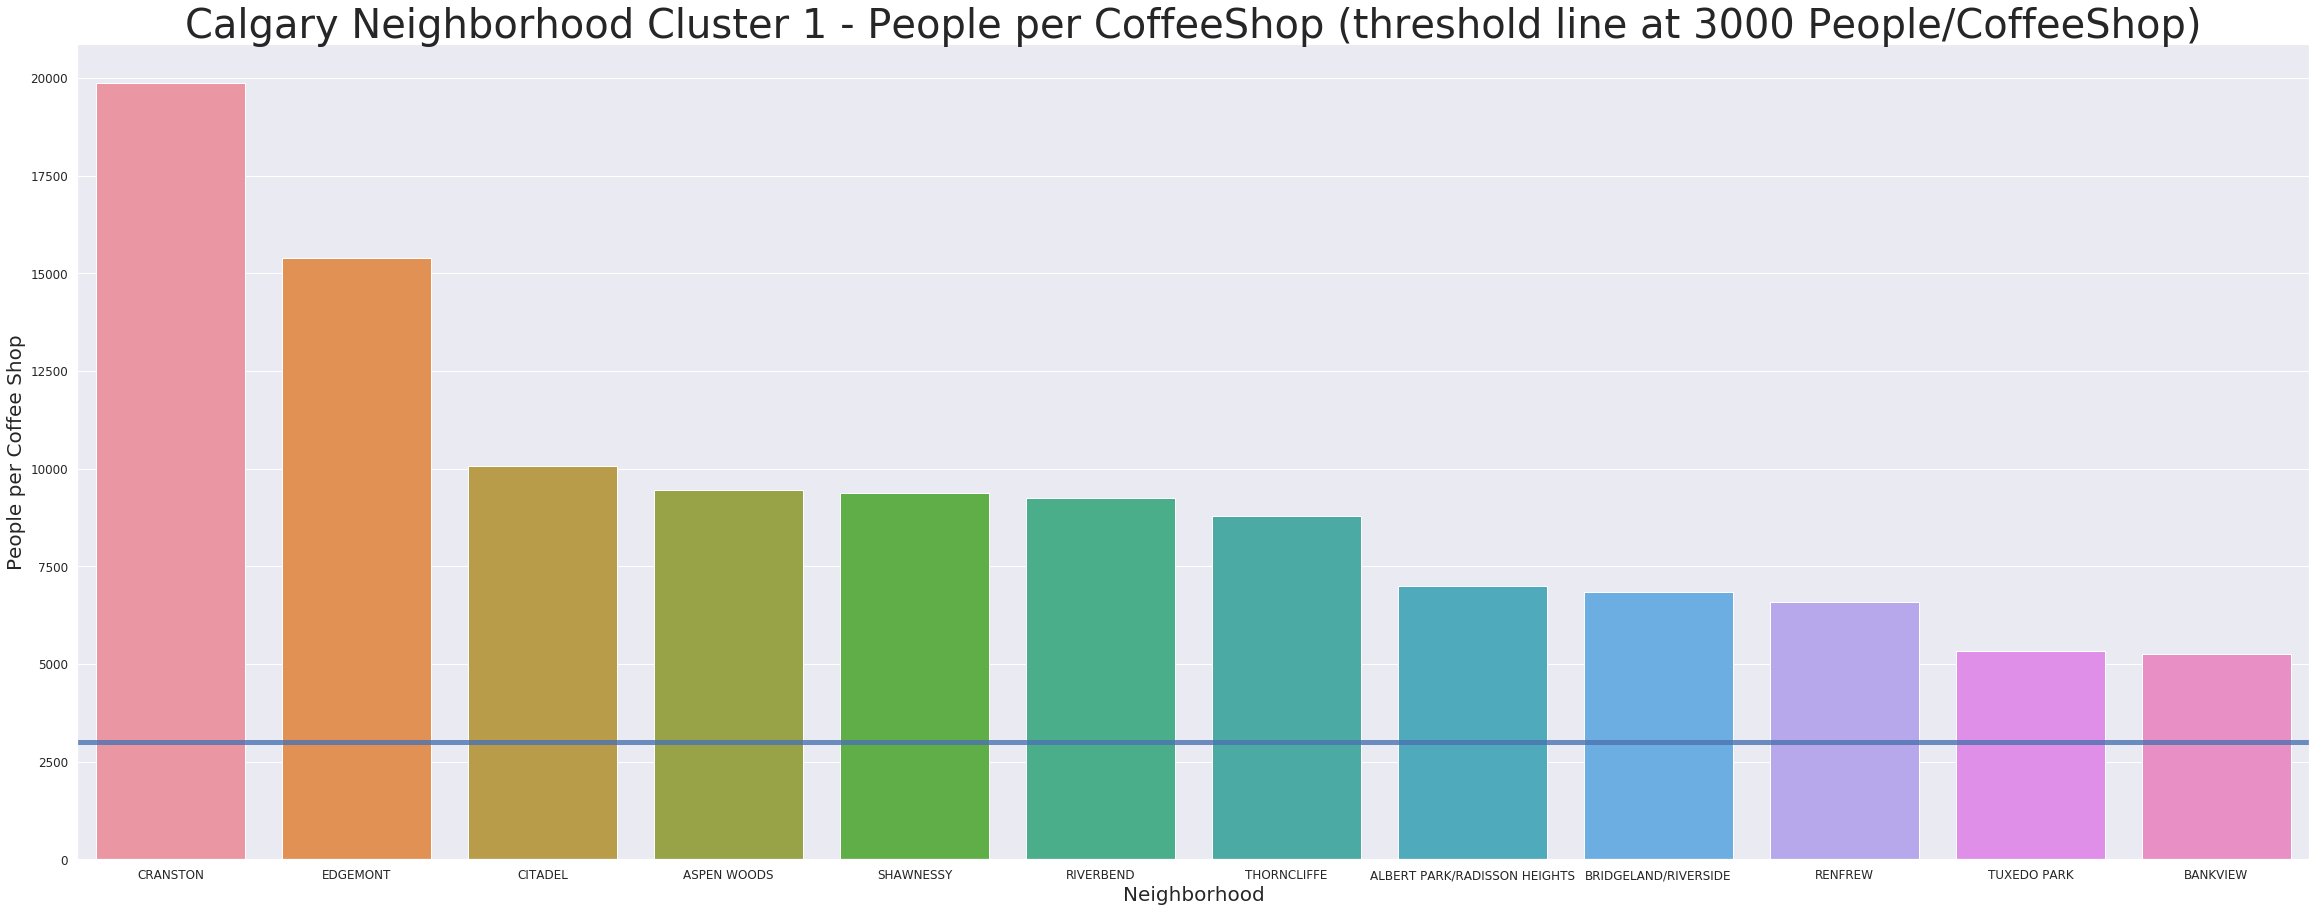

In [137]:
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(40,15))
ax3 = sns.barplot(x="Neighborhood", y="People_per_CoffeeShop", data = Cluster1)
ax3.set_title("Calgary Neighborhood Cluster 1 - People per CoffeeShop (threshold line at 3000 People/CoffeeShop)", fontsize = 40)
ax3.set_xlabel("Neighborhood", fontsize = 20)
ax3.tick_params(labelsize=12)
ax3.set_ylabel("People per Coffee Shop", fontsize = 20)
ax3.axhline(y=3000, linewidth=5, label = "3000 - Minimum People per CoffeeShop", alpha=0.8)

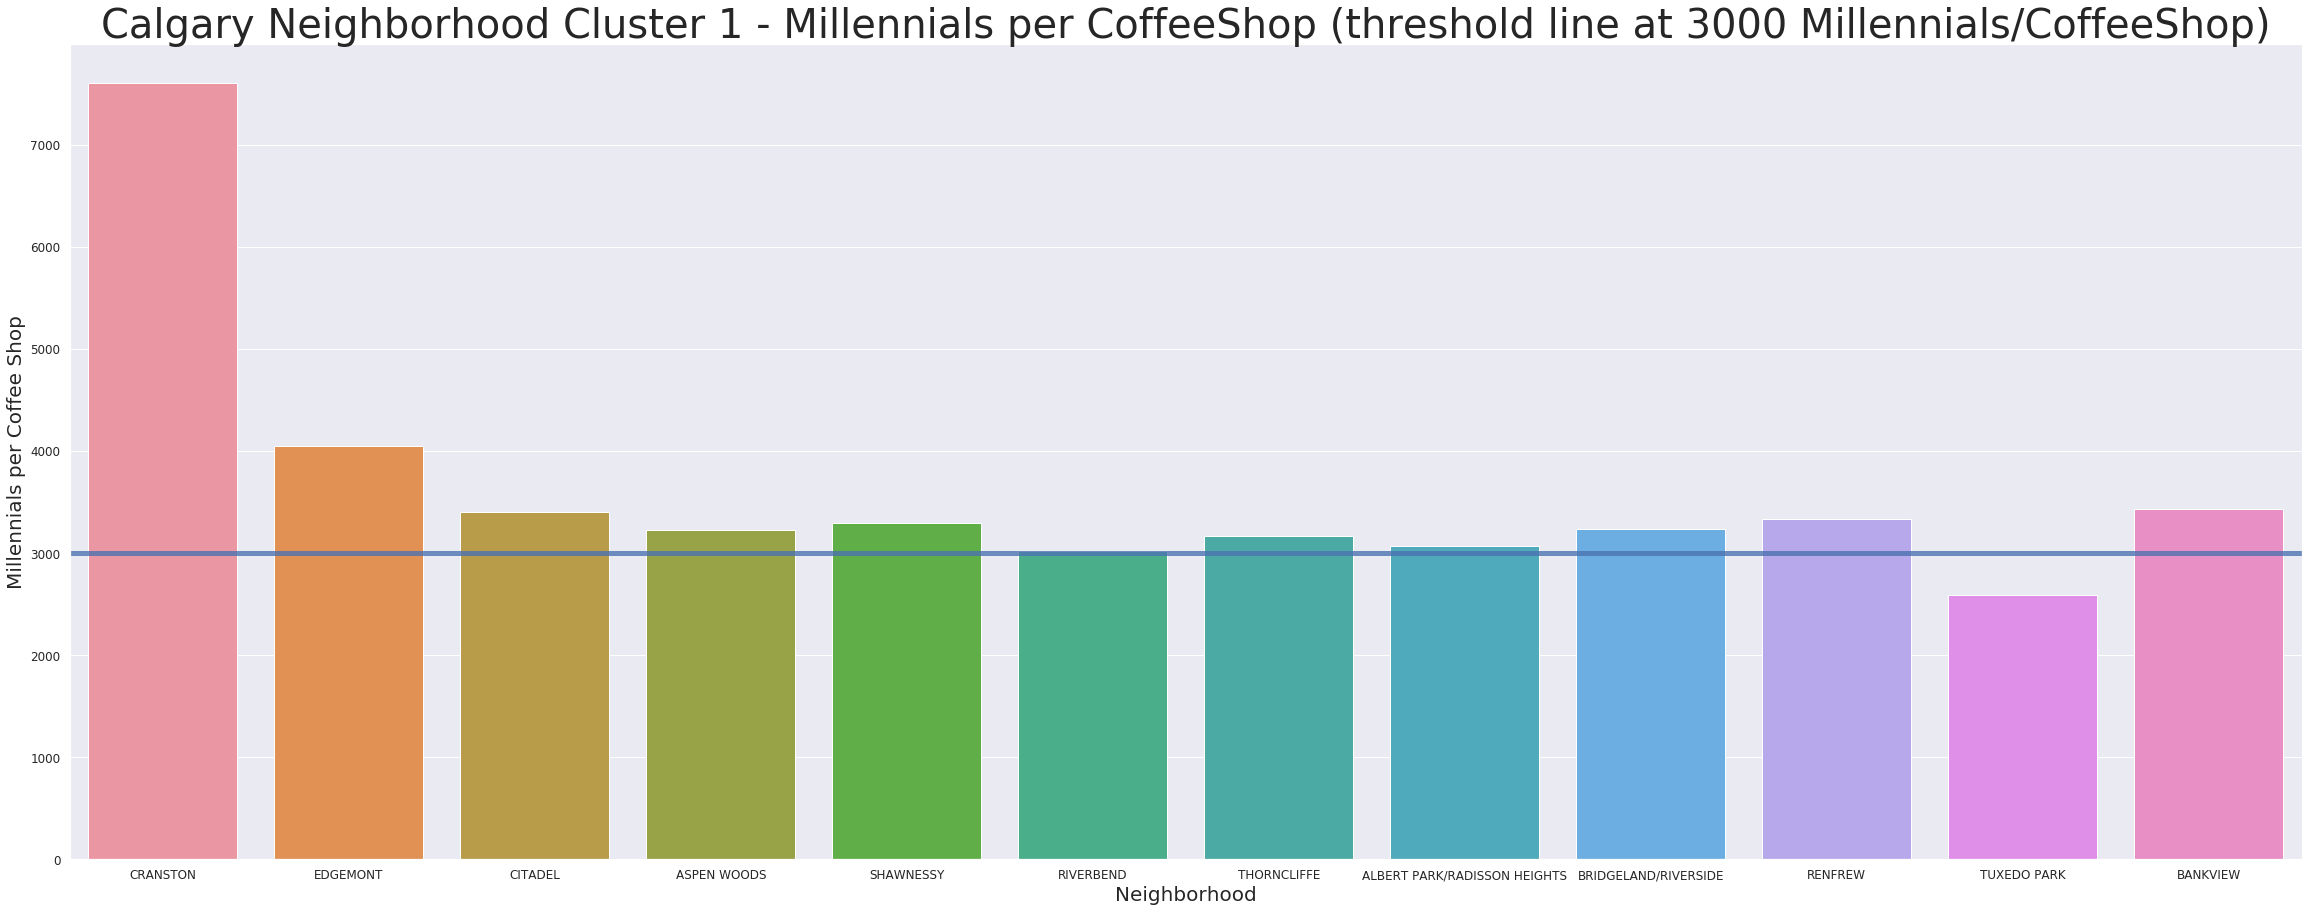

In [143]:
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(40,15))
ax3 = sns.barplot(x="Neighborhood", y="Millennials_per_CoffeeShop", data = Cluster1)
ax3.set_title("Calgary Neighborhood Cluster 1 - Millennials per CoffeeShop (threshold line at 3000 Millennials/CoffeeShop)", fontsize = 40)
ax3.set_xlabel("Neighborhood", fontsize = 20)
ax3.tick_params(labelsize=12)
ax3.set_ylabel("Millennials per Coffee Shop", fontsize = 20)
ax3.axhline(y=3000, linewidth=5, label = "3000 - Minimum People per CoffeeShop", alpha=0.8)

#### Cluster 2

In [138]:
Cluster2 = calgary_merged[calgary_merged['Cluster Labels'] == 1]
Cluster2

,Neighborhood,Coffee Shop,Cluster Labels,1st Most Common Venue,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent,People_per_CoffeeShop,Millennials_per_CoffeeShop
7,DOWNTOWN COMMERCIAL CORE,9,1,Coffee Shop,-114.069590268745,51.0472701323622,Residential,CENTRE,8683,894,3179,1504,5577,0.64229,964,619


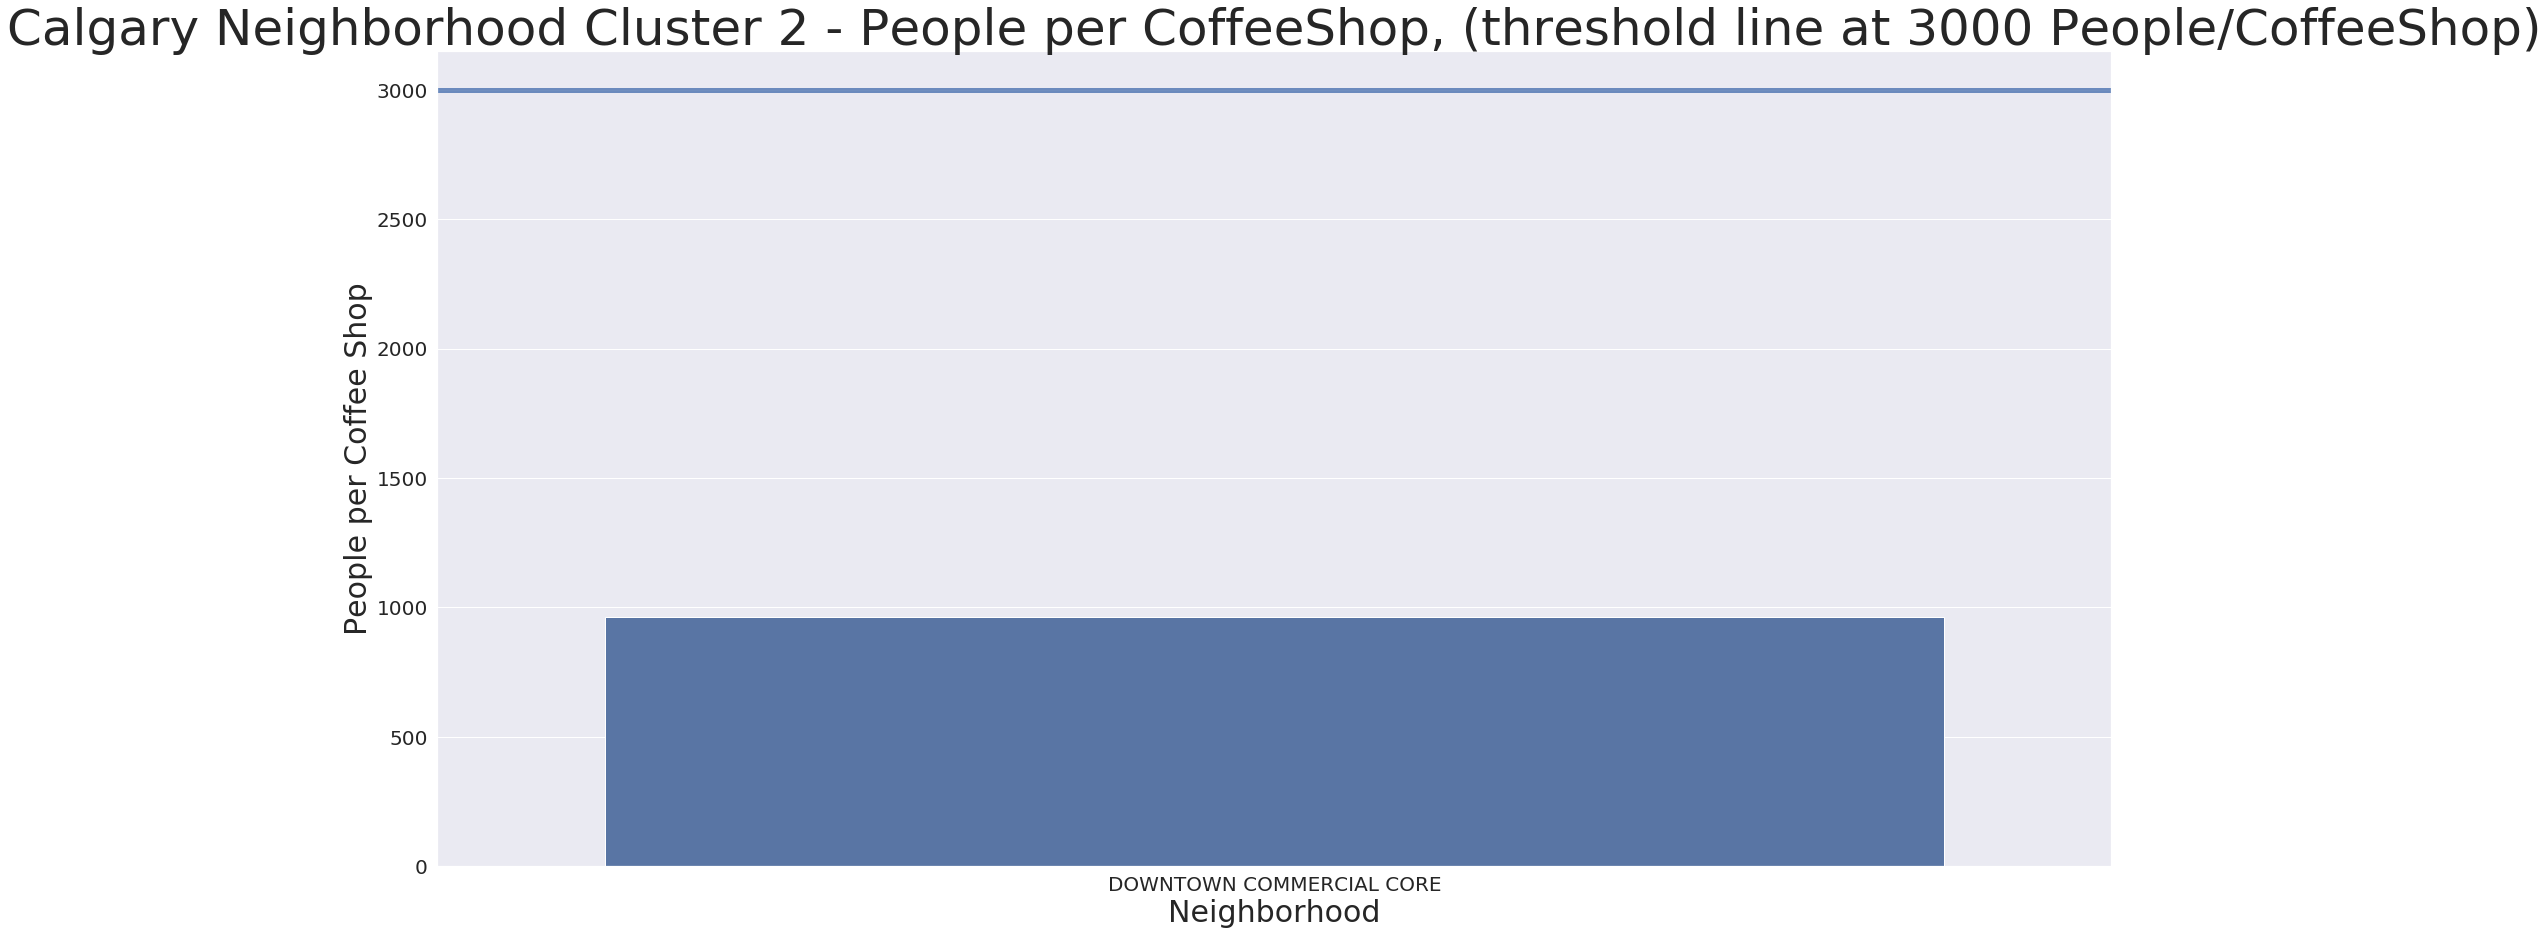

In [139]:
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(30,15))
ax4 = sns.barplot(x="Neighborhood", y="People_per_CoffeeShop", data = Cluster2)
ax4.set_title("Calgary Neighborhood Cluster 2 - People per CoffeeShop, (threshold line at 3000 People/CoffeeShop)", fontsize = 50)
ax4.set_xlabel("Neighborhood", fontsize = 30)
ax4.set_ylabel("People per Coffee Shop", fontsize = 30)
ax4.tick_params(labelsize=20)
ax4.axhline(y=3000, linewidth=5, label = "3000 - Minimum People per CoffeeShop", alpha=0.8)


#### Cluster 3

In [140]:
Cluster3 = calgary_merged[calgary_merged['Cluster Labels'] == 2]
Cluster3

,Neighborhood,Coffee Shop,Cluster Labels,1st Most Common Venue,Longitude,Latitude,Area_Class,Sector,Population,Population_20_24,Population_25_34,Population_35_44,Millennial_Population,Millennial_Percent,People_per_CoffeeShop,Millennials_per_CoffeeShop
9,MCKENZIE TOWNE,2,2,Coffee Shop,-113.96147703565,50.9171357418281,Residential,SOUTHEAST,18283,759,3050,3753,7562,0.413608,9141,3781
4,CHAPARRAL,2,2,Coffee Shop,-114.025647775936,50.8846016151615,Residential,SOUTH,12654,720,1161,2071,3952,0.312312,6327,1976
16,WEST SPRINGS,3,2,Coffee Shop,-114.206168318752,51.0597323984505,Residential,WEST,10758,411,905,2057,3373,0.313534,3586,1124
10,MISSION,3,2,Coffee Shop,-114.066321693987,51.0310903237998,Residential,CENTRE,4598,281,1829,900,3010,0.654632,1532,1003


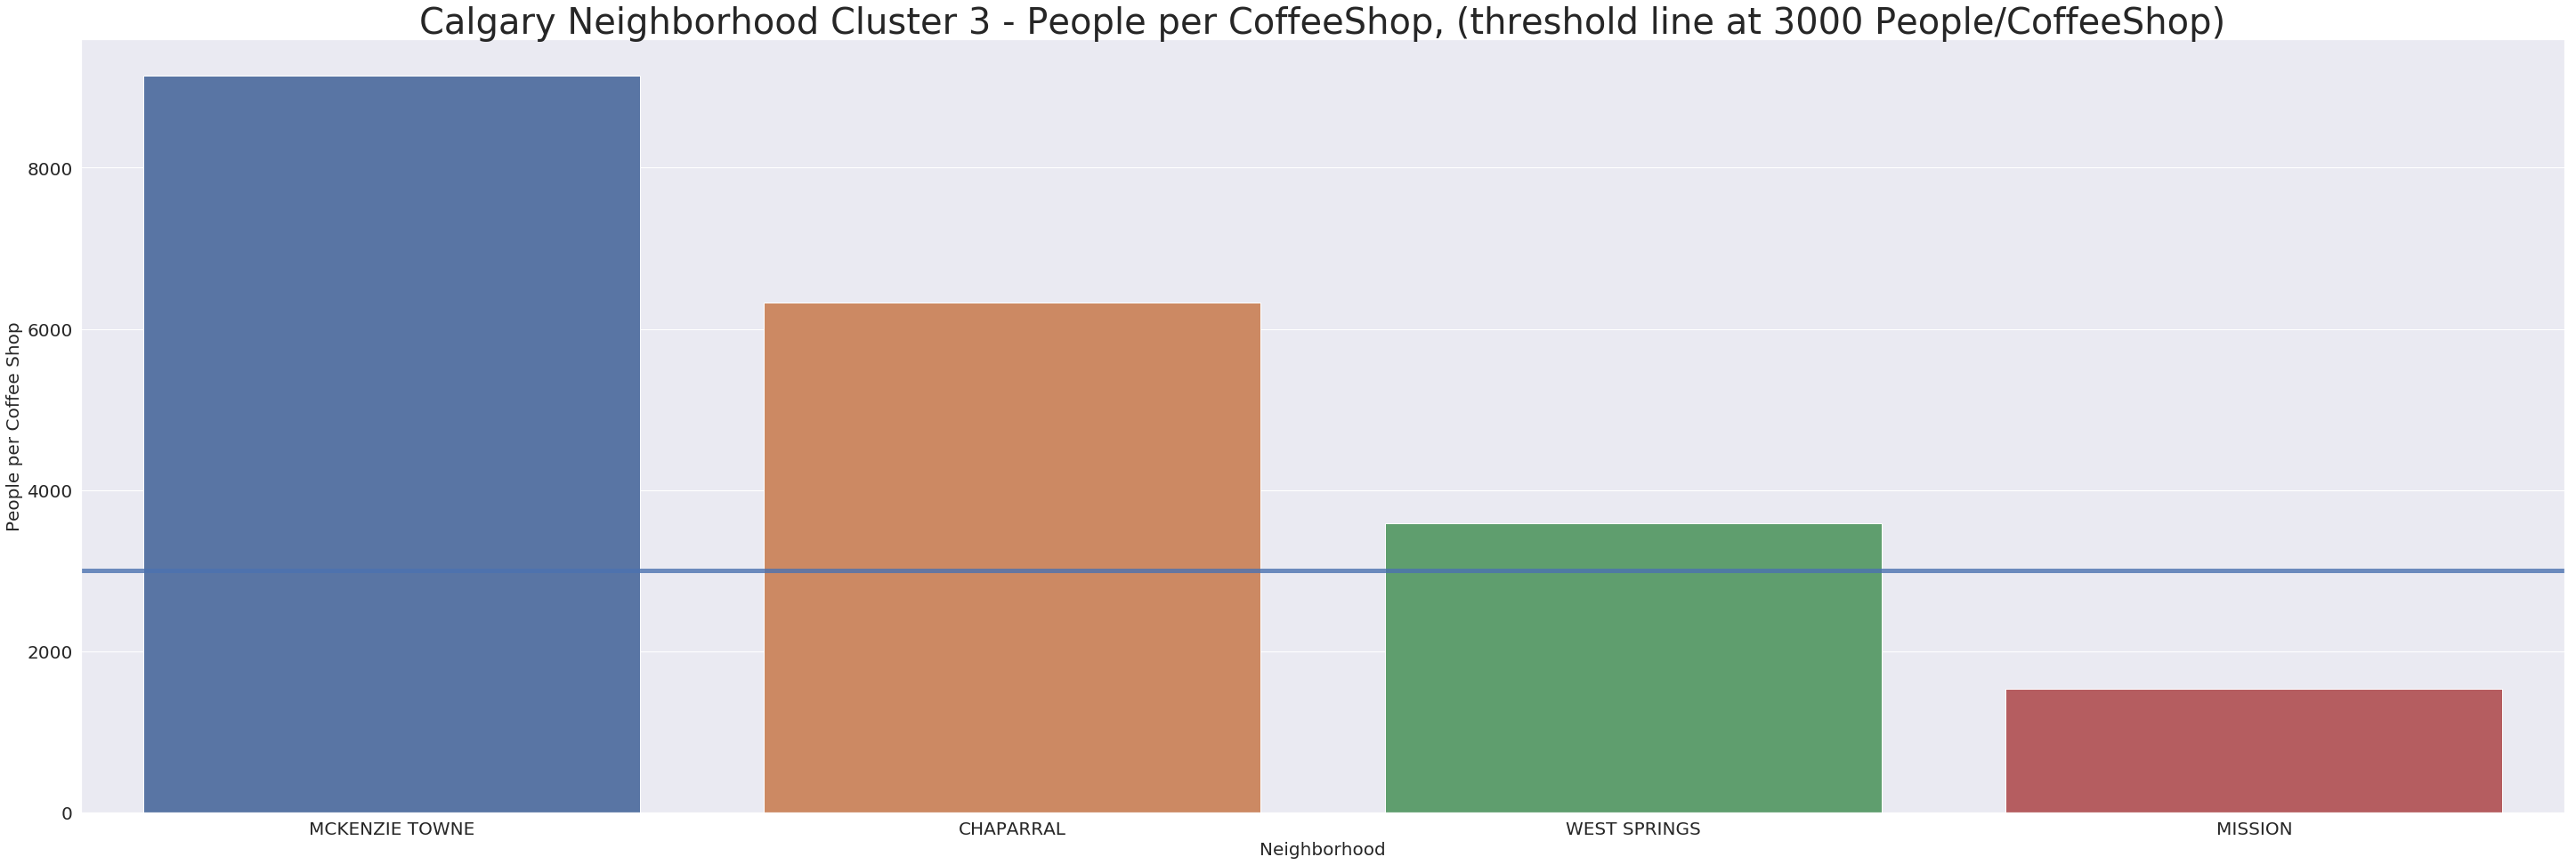

In [142]:
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(50,16))
ax5 = sns.barplot(x="Neighborhood", y="People_per_CoffeeShop", data = Cluster3)
ax5.set_title("Calgary Neighborhood Cluster 3 - People per CoffeeShop, (threshold line at 3000 People/CoffeeShop)", fontsize = 40)
ax5.set_xlabel("Neighborhood", fontsize = 20)
ax5.set_ylabel("People per Coffee Shop", fontsize = 20)
ax5.tick_params(labelsize=20)
ax5.axhline(y=3000, linewidth=5, label = "3000 - Minimum People per CoffeeShop", alpha=0.8)


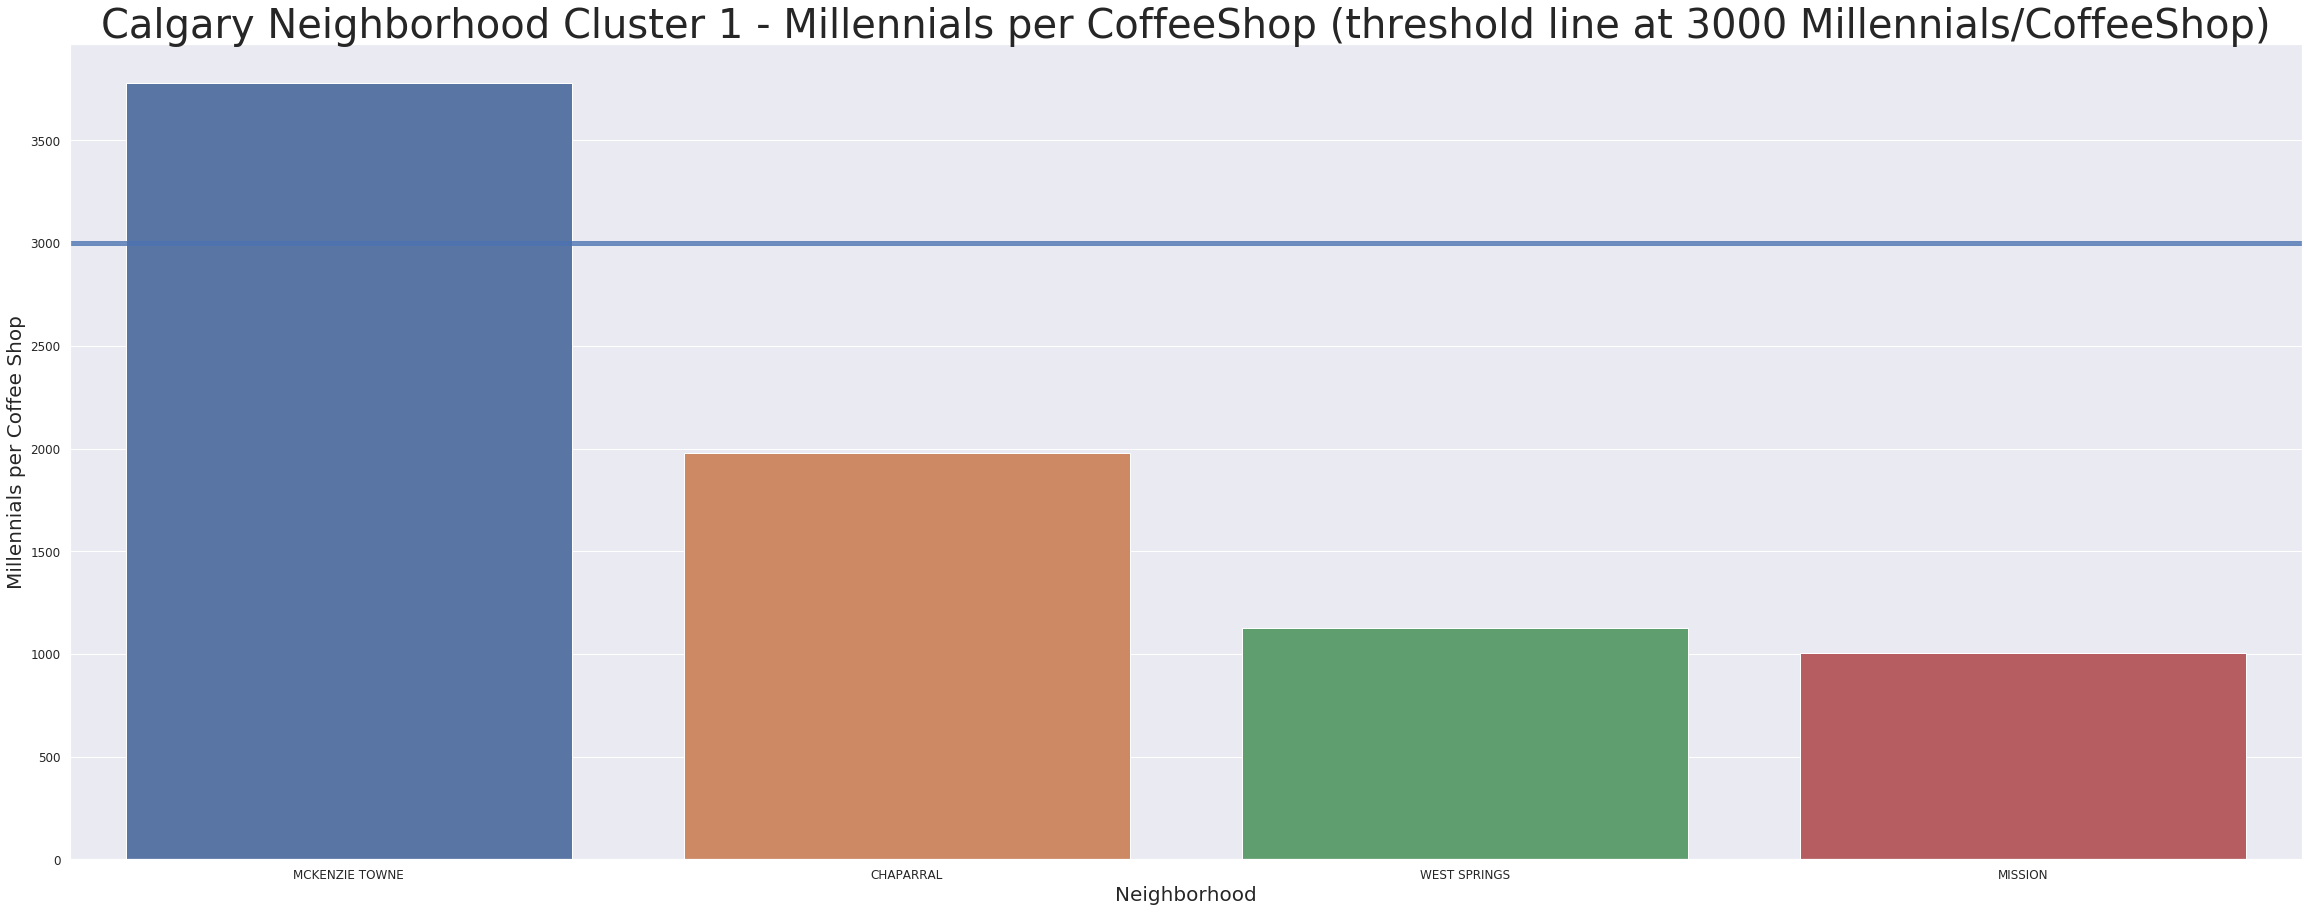

In [144]:
sns.set(style="darkgrid")
#calgary_data = sns.load_dataset("calgary_data")
plt.figure(figsize=(40,15))
ax5 = sns.barplot(x="Neighborhood", y="Millennials_per_CoffeeShop", data = Cluster3)
ax5.set_title("Calgary Neighborhood Cluster 1 - Millennials per CoffeeShop (threshold line at 3000 Millennials/CoffeeShop)", fontsize = 40)
ax5.set_xlabel("Neighborhood", fontsize = 20)
ax5.tick_params(labelsize=12)
ax5.set_ylabel("Millennials per Coffee Shop", fontsize = 20)
ax5.axhline(y=3000, linewidth=5, label = "3000 - Minimum People per CoffeeShop", alpha=0.8)

# Let's get the Top Spots for a Coffee Shop in Calgary with Millennial population and Coffee Shop density in mind! 

In [150]:
millcgy_coffeeshop = calgary_merged[calgary_merged.Millennials_per_CoffeeShop >= 3000]
millcgy_coffeeshop = millcgy_coffeeshop[['Neighborhood','Sector','Coffee Shop','Millennial_Population','Millennials_per_CoffeeShop']]
millcgy_coffeeshop.sort_values(by=['Millennials_per_CoffeeShop'],ascending=False)
millcgy_coffeeshop.head(5)

,Neighborhood,Sector,Coffee Shop,Millennial_Population,Millennials_per_CoffeeShop
6,CRANSTON,SOUTHEAST,1,7611,7611
8,EDGEMONT,NORTHWEST,1,4046,4046
5,CITADEL,NORTHWEST,1,3408,3408
1,ASPEN WOODS,WEST,1,3228,3228
13,SHAWNESSY,SOUTH,1,3297,3297


# Let's get the Top 5 Spots based on general population and Coffee Shop Density

In [149]:
cgy_coffeeshop = calgary_merged[calgary_merged.People_per_CoffeeShop >= 3000]
cgy_coffeeshop = cgy_coffeeshop[['Neighborhood','Sector','Coffee Shop','Population','People_per_CoffeeShop']]
cgy_coffeeshop.sort_values(by=['People_per_CoffeeShop'],ascending=False)
cgy_coffeeshop.head(5)

,Neighborhood,Sector,Coffee Shop,Population,People_per_CoffeeShop
6,CRANSTON,SOUTHEAST,1,19884,19884
8,EDGEMONT,NORTHWEST,1,15395,15395
5,CITADEL,NORTHWEST,1,10077,10077
1,ASPEN WOODS,WEST,1,9446,9446
13,SHAWNESSY,SOUTH,1,9368,9368
